# Data Overview

A notebook that provides a quick overview of the data in the project. This gives a broad overview of the 
quantity of poems in the dataset.

## Notebook setup

Ensure that necessary libraries are install and imported into the workplace.

In [1]:
# setup relative path to import local module (needed when used in Conda) https://stackoverflow.com/questions/34478398
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import visualising_poetry.data as vpd

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from IPython.display import display, HTML

# get data and process (if necessary)
vpd.setup_if_needed()

# get data as a single data frame
df = vpd.complete_dataset()

## Total number of poems per publications

How many poems have been identified in each publication?

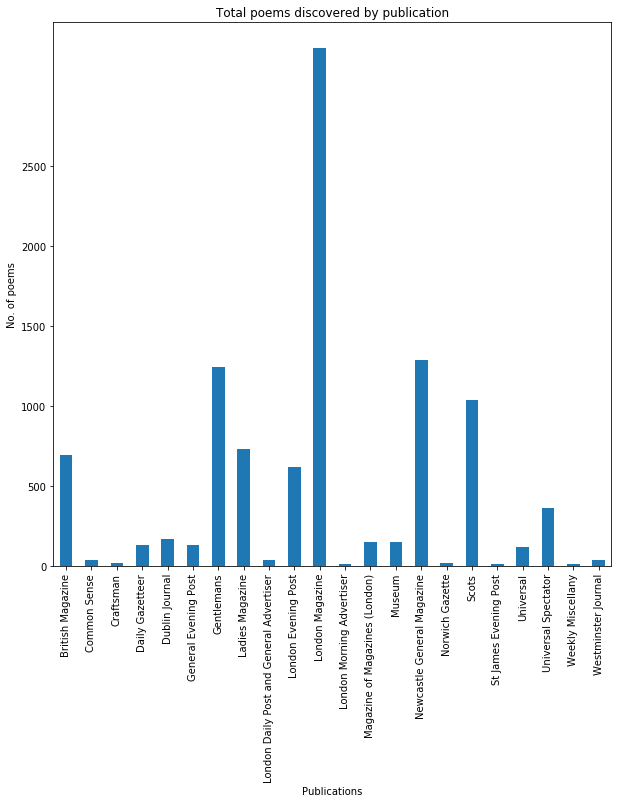

In [2]:
total = df.groupby('publication title')['first line'].size()
total.plot(kind='bar', title="Total poems discovered by publication", figsize=(10,10), yticks=np.arange(0,3000,500))
plot.xlabel("Publications")
plot.ylabel("No. of poems")
plot.show()

## Total number of identified poems by year

Show the number of identified poems per year regardless of publication.

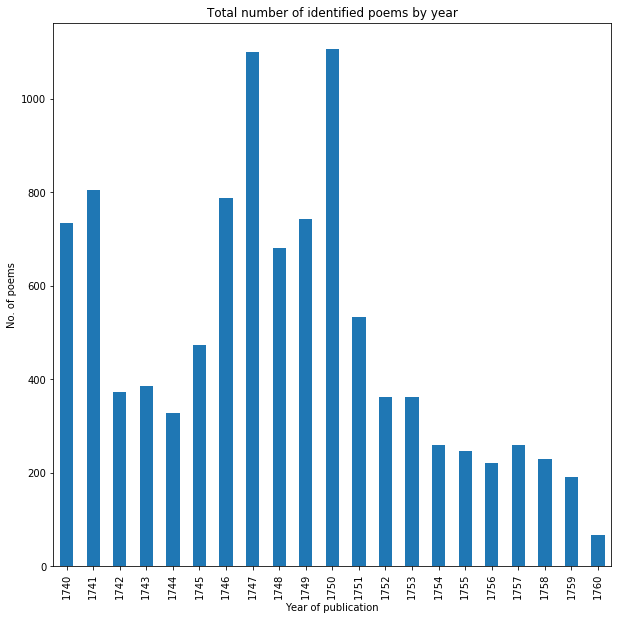

In [3]:
# counts the poems by year
total_by_year = df.groupby('year')['first line'].size()

# get the date range of the data set
start_year = vpd.start_year(df)
end_year = vpd.end_year(df)

# reindex the results to include years not covered
total_by_year_updated = total_by_year.reindex(np.arange(start_year, end_year + 1, 1))

# generate a plot
total_by_year_updated.plot(kind='bar', title="Total number of identified poems by year", figsize=(10,10))
plot.xlabel("Year of publication")
plot.ylabel("No. of poems")
plot.show()

## Total number of identified poems (and copies) by year

Show the total number of identified poems per year regardless of publication, along with the total number
of poems that have been identified as copies.

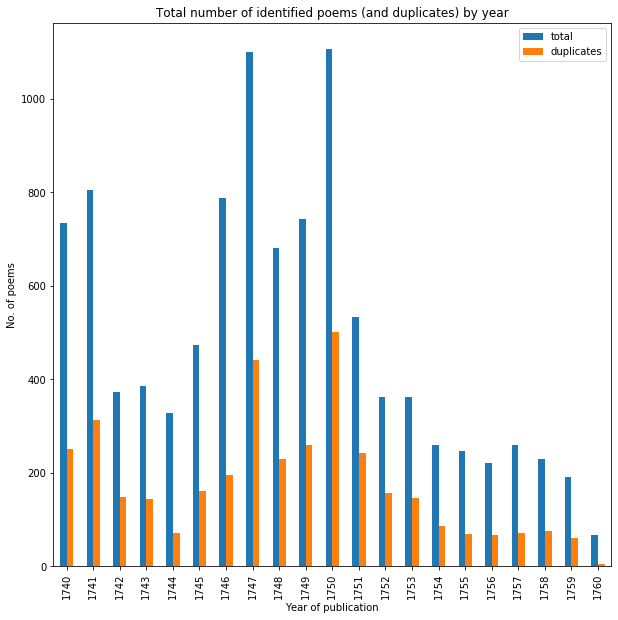

In [4]:
# counts of duplicates by the year
duplicates_by_year = df.groupby('year')['ref no'].count()

# get the date range of the data set
start_year = vpd.start_year(df)
end_year = vpd.end_year(df)

# reindex the results to include years not covered
total_by_year_reindex = total_by_year.reindex(np.arange(start_year, end_year + 1, 1))
duplicates_by_year_reindex = duplicates_by_year.reindex(np.arange(start_year, end_year + 1, 1))

# create a new data frame
df2 = pd.DataFrame({"total": total_by_year_reindex, "duplicates": duplicates_by_year_reindex})

# generate a plot
df2.plot(kind='bar', title="Total number of identified poems (and duplicates) by year", figsize=(10,10))
plot.xlabel("Year of publication")
plot.ylabel("No. of poems")
plot.show()

## Total number of identified poems by publication type

Display the distribution of poems across the different publication types.

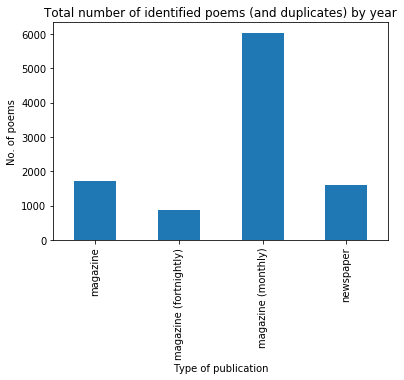

In [5]:
total_by_type = df.groupby('publication type')['first line'].count()
total_by_type.plot(kind='bar', title="Total number of identified poems (and duplicates) by year")
plot.xlabel("Type of publication")
plot.ylabel("No. of poems")
plot.show()

## Do we have unexpected attribute types?

Unexpected types will appear in a table with a summary of the poem.

In [6]:
unexpected = vpd.unexpected_attribute_types(df)
display(HTML(unexpected.to_html()))


,ref no,publication title,year,month,day,printed (string),authorship,first line,attribution type
79,1001071,Newcastle General Magazine,1747,June,NaN,1747-07-01,nan,Fire water women are man's ruin,f.pseud/f.d.e.
